# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Откройте файл с данными и изучите общую информацию.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [ ]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [ ]:
data.info()
#посмотрим информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

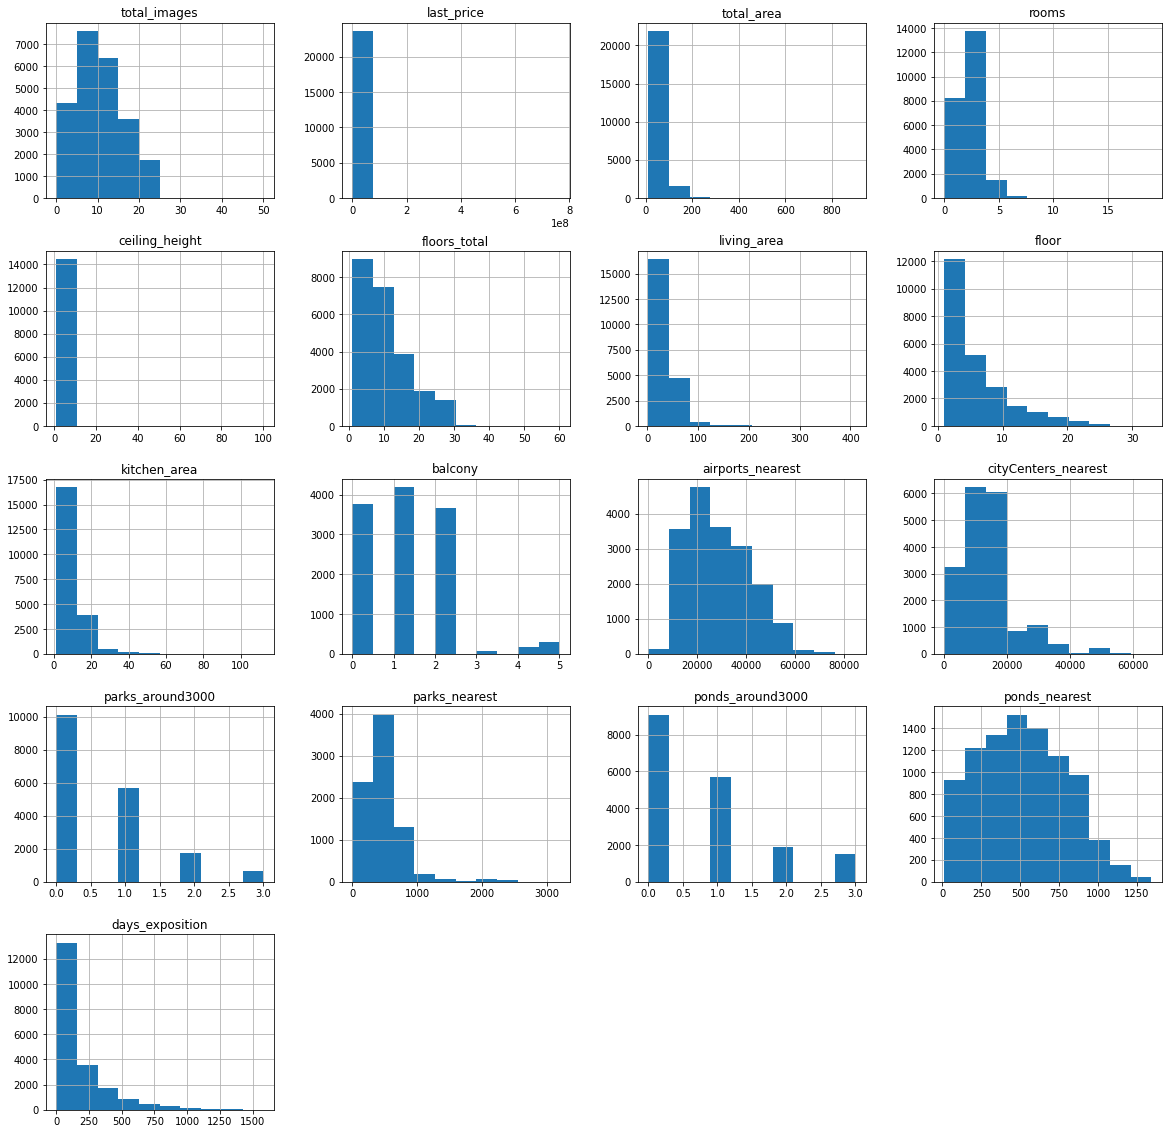

In [ ]:
data.hist(figsize=(20, 20))
plt.show()
#выводим гистрограммы

*Вывод*
Прочитали файл
Нужно изменить тип данных в нескольких столбцах:
В last_price указано вещественное число, меняем на целое число
В floors_total указаны вещественные числа, но количество этажей может быть только целыми числам.
В is_apartament указана строка, но как мы знаем в данном столбце указывается булевое значение
В first_day_exposition нужно преобразовать к формату datatime
В столбцах balcony, parks_around3000, ponds_around3000, days_exposition указаны вещественные числа, надо изменить на целые числа (целое число балконов, парков, водоемов, дней)
Большое количество пропусков в большинстве столбцов. Будем исправлять.
Приведем названия столбцов к единому стилю.


### Предобработка данных

In [ ]:
#приведем столбцы к хорошему стилю
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [ ]:
data = data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


 #### Обработка пропусков

In [ ]:
# обработка пропусков (посмотрим количесвто пропусков)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [ ]:
#заменим пропуски в аппартаментах на булевой тип
data['is_apartment'].fillna(False, inplace=True)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
#заменяем пропуск по болконам на 0
data['balcony'].fillna(0, inplace=True)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
#заменяем пропуски по высоте потолков медиальным значением
for gg in data['locality_name'].unique():
    data.loc[(data['locality_name'] == gg) & (data['ceiling_height'].isna()), 'ceiling_height'] = data.loc[data['locality_name'] == gg, 'ceiling_height'].median()


In [ ]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.63,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.70,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.70,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.60,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.64,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.70,24.0,NaN,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


вывод: в 14 столбцах из 22 есть пропуски.

ceiling_height: 9195 пропусков. Некоторые объявления не имеют информацию о высоте потолков, это очень большое количество.

floors_total: 86 пропусков. Пропусков мало, на исследование не повлияют

living_area: 1903 пропуска. пользователи не помнят точную площадь, поэтому не пишут ее. но данные по этому столбцу нужны нам для исследования. Надо поправить  

is_apartment: 20924 пропусков. пользователи часто не указывают тип недвижимости, если он просто жилой. в этом столбце булев тип данных.

kitchen_area: 2278 пропусков. Вероятно, пользователи не указывают точный метраж кухни, не знают его,  но нам важны эти данные для исследования. Нужно посмотреть и справить для дальнейших иследований.

balcony: 11519 пропусков. Вероятно, пользователи при отсутствии балконов их не указывают. В таком случае заменим пропуски нулями.

locality_name: 49 пропусков. Количество пропусков мало, на исследование не повлияют

airports_nearest: 5542 пропусков. Вероятно, пропуски возникли в связи с отсутствием информации о местности.

city_centers_nearest: 5519 пропусков. Вероятно, пропуски возникли в связи с отсутствием информации о местности. Пропуски в столбце на исследование не повлияют.

parks_around_3000: 5518 пропусков. Число пропусков совпадает с числом пропусков в ponds_around_3000, что подозрительно. Возможно, для этих объектов не была получена информация на основе данных о местности.

parks_nearest: 15620 пропусков. Более половины объектов не имеют информации о ближайшем парке. Скорее всего, информация основе данных о местности не была получена. Пропуски в столбце на задачи исследования не влияют.

ponds_around_3000: 5518 пропусков. Число совпадает с числом пропусков parks_around_3000, что выглядит странно. Скорее всего, для этих объектов не была получена информация на основе данных о местности. Пропуски в столбце на исследование не влияют.

ponds_nearest: 14589 пропусков. Больше половины объектов не имеют информации о ближайшем парке. Скорее всего, информация на основе данных о местности не была получена. Пропуски в столбце на задачи исследования не влияют.

days_exposition: 3181 пропусков. объявления не содержат информации о количестве дней размещения объявления. эти данные должны быть получены автоматом. Возможно, это техническая ошибка. Данные этого столбца важны для исследования.

Pанее мы писали о том чтобы изменить тип данных в таблице
в столбцах: last_price, balcony, first_day_exposition, is_apartment.

#### Изменение типов данных

In [ ]:
#преобразуем столбцы 'last_praice', 'balcony' к типу int
data['last_price'] = data['last_price'].astype('int')
data['balcony'] = data['balcony'].astype('int')


In [ ]:
#преобразуем столбец 'first_day_exposition' к формату datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],  format='%Y-%m-%dT%H:%M:%S')

In [ ]:
# преобразуем столбец 'is_apartment' к булевому типу
data['is_apartment'] = data['is_apartment'].astype('bool')

In [ ]:
# проверяем наши изменения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23543 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

в данной таблице были допущены ошибки, техническая ошибка.
мы изменили тип данных, которые влияют на наше иследование, преобразовали целые числа, булевые значения и формат даты и времени

#### Обработка дубликатов

In [ ]:
for gg in data['locality_name'].unique():
    data.loc[(data['locality_name'] == gg) & (data['ceiling_height'].isna()), 'ceiling_height'] =
    data.loc[data['locality_name'] == gg,'ceiling_height'].median()

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.63,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.70,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
# проверим дубликаты и выведем их сумму
data.duplicated().sum()

0

In [ ]:
data['locality_name'].isna().sum()

49

In [ ]:
# проверяем неявных дубликатов
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [ ]:
data_list = ['городского типа', 'садовое товарищество', 'коттеджный','городской'
             , 'поселок', 'посёлок', 'деревня', 'село', 'садоводческое некоммерческое товарищество']
for i in data_list:
    data['locality_name'] = data['locality_name'].str.replace(i, '')

In [ ]:
data['locality_name'].sort_values().unique()

array(['  Большая Ижора', '  Будогощь', '  Важины', '  Виллози',
       '  Вознесенье', '  Вырица', '  Дружная Горка', '  Дубровка',
       '  Ефимовский', '  Кивеннапа Север', '  Кондратьево',
       '  Красный Бор', '  Кузнечное', '  Кузьмоловский', '  Лебяжье',
       '  Лесное', '  Лесогорский', '  Мга', '  Назия', '  Никольский',
       '  Новоселье', '  Павлово', '  Приладожский', '  Рахья',
       '  Рощино', '  Рябово', '  Свирьстрой', '  Сиверский',
       '  Синявино', '  Советский', '  Счастье', '  Тайцы', '  Токсово',
       '  Ульяновка', '  Форносово', '  Фёдоровское', '  Янино-1',
       '  имени Морозова', '  имени Свердлова', ' Агалатово',
       ' Александровская', ' Алексеевка', ' Аннино', ' Аро', ' Барышево',
       ' Батово', ' Бегуницы', ' Белогорка', ' Белоостров',
       ' Большая Вруда', ' Большая Пустомержа', ' Большие Колпаны',
       ' Большое Рейзино', ' Большой Сабск', ' Бор', ' Борисова Грива',
       ' Бугры', ' Ваганово', ' Вартемяги', ' Вахнова Кара',


In [ ]:
# проверяем
data['locality_name'].nunique()

318

In [ ]:
# удалем пропущеные строки в которых не указан нас. пункт
data = data.dropna(subset=['locality_name'])

In [ ]:
data['locality_name'].isna().sum()

0

обратим внимание на высоту потолков

In [ ]:
data['ceiling_height'].unique()

array([  2.7  ,   2.63 ,   3.03 ,   2.6  ,   2.64 ,   2.5  ,   2.67 ,
         2.55 ,   2.56 ,   3.05 ,   2.75 ,   2.9  ,   2.56 ,   2.8  ,
         3.   ,   2.65 ,   3.2  ,   2.61 ,     nan,   3.25 ,   3.45 ,
         2.77 ,   2.85 ,   2.525,   2.57 ,   4.15 ,   3.5  ,   3.3  ,
         2.71 ,   4.   ,   2.47 ,   2.73 ,   2.84 ,   3.1  ,   2.34 ,
         3.4  ,   2.52 ,   3.06 ,   2.72 ,   2.54 ,   2.51 ,   2.78 ,
        13.85 ,   2.76 ,  25.   ,   2.58 ,   3.7  ,   5.2  ,   2.87 ,
         2.66 ,   2.59 ,   2.   ,   2.45 ,   3.6  ,   3.9  ,   2.92 ,
         3.11 ,   3.13 ,   3.8  ,   3.15 ,   3.55 ,   3.16 ,   3.62 ,
         3.12 ,   2.53 ,   2.74 ,   2.96 ,   2.46 ,   5.3  ,   5.   ,
         2.79 ,   2.95 ,   4.06 ,   2.94 ,   3.82 ,   3.54 ,   3.53 ,
         2.83 ,   4.7  ,   2.4  ,   3.38 ,   3.01 ,   5.6  ,   3.65 ,
         3.18 ,   3.35 ,   2.3  ,   3.57 ,   2.48 ,   2.515,   2.62 ,
         2.82 ,   2.65 ,   3.98 ,   3.83 ,  27.   ,   3.52 ,   3.95 ,
         3.75 ,   2.

мы можем заметить что высота скачет от 1 метра до 100. Можно заметить, что встречаются также потолки размером 20-32 метров. Что тоже аномалия. Логично предположить, что на самом деле это значения: 2-3 метра. Следовательно нужно поделить такие значения на 10.

In [ ]:
# Для значений больше 20 применим деление на 10
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10

In [ ]:
# посмотрим сколько таких больших значений
data.loc[data['ceiling_height'] >= 6, 'ceiling_height']=np.nan

In [ ]:
#прверим
data['ceiling_height'].nunique()

181

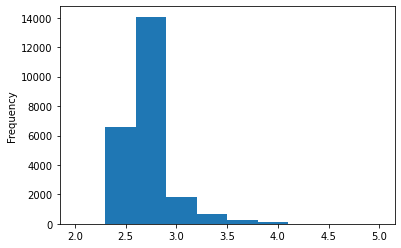

In [ ]:
# построим график чтобы ещё раз проверить наше решение
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 10, range=(2,5))
plt.show()

In [ ]:
# удалем пропущеные строки в которых не указана высота
data = data.dropna(subset=['ceiling_height'])

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               84
living_area              1874
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2238
balcony                     0
locality_name               0
airports_nearest         5414
city_centers_nearest     5391
parks_around_3000        5390
parks_nearest           15458
ponds_around_3000        5390
ponds_nearest           14439
days_exposition          3154
dtype: int64

теперь мы видем что в среднем высота потолков от 2,3 метра до 4,2 это допустимые параметры для квартир. значение где потолки больше 6 метров мы присвоили nan

обратим внимане на столбец 'floors_total' этажность дома

In [ ]:
data['floors_total'].isna().sum()

84

In [ ]:
# Строим сводную таблицу с медианным значением
floor_median = data.pivot_table(index='floor', values='floors_total', aggfunc='median').reset_index()

# Строим цикл
for gg in range(data.floor.min(), (data.floor.max()+1)):
    data.loc[data['floor'] == gg, 'floors_total'] = \
    (data.loc[data['floor'] == gg, 'floors_total'] \
    .fillna(floor_median[floor_median['floor'] == gg]['floors_total'].sum()))


In [ ]:
data = data.dropna(subset=['floors_total'])

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1874
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2238
balcony                     0
locality_name               0
airports_nearest         5414
city_centers_nearest     5391
parks_around_3000        5390
parks_nearest           15458
ponds_around_3000        5390
ponds_nearest           14439
days_exposition          3154
dtype: int64

посмотрим на столбец с жилой площадью 'living_area' и 'kitchen_area' там имеются аномалии

In [ ]:
# Заменяем пустые значения жилой площади
living_gg = data['living_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_gg * data['total_area'], inplace=True)

In [ ]:
# Заменяем пустые значения площади кухни
kitchen_gg = data['kitchen_area'].mean() / data['total_area'].mean()
data['kitchen_area'].fillna(kitchen_gg * data['total_area'], inplace=True)

обратим внимание на столбцы число водоёмов в радиусе 3 км, число парков в радиусе 3 км
там есть аномалии

In [ ]:
data['parks_around_3000'].isna().sum()

5390

In [ ]:
len(data['parks_around_3000'])

23518

мы можем наблюдать аномальные значения, они не сильно большие их можно убрать, но на иследование они не влияют. оставим их неизмененными

In [ ]:
data['ponds_around_3000'].isna().sum()

5390

In [ ]:
len(data['ponds_around_3000'])

23518

мы можем наблюдать аномальные значения, они не сильно большие их можно убрать, но на иследование они не влияют. оставим их неизмененными

<AxesSubplot:>

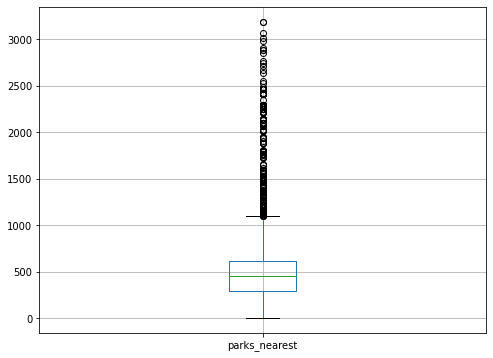

In [ ]:
data['parks_nearest'].isna().sum()
data.boxplot(column='parks_nearest', figsize=(8, 6))

на диаграмме размаха мы видем выбросы после 1200 аномалии даных выбросов нам не известы, на иследование это не повлияет

<AxesSubplot:>

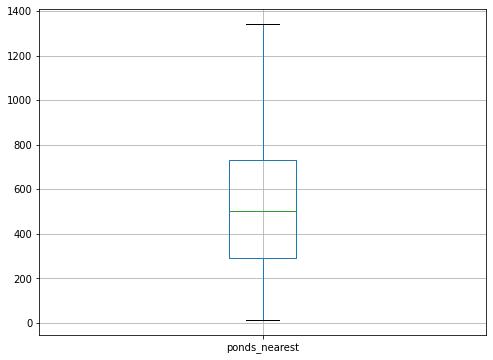

In [ ]:
data.boxplot(column='ponds_nearest', figsize=(8, 6))

на данной диаграм мы видем выбросы удаленности от водоема, данная анамалия не известна, на иследование это не повлияет

<AxesSubplot:>

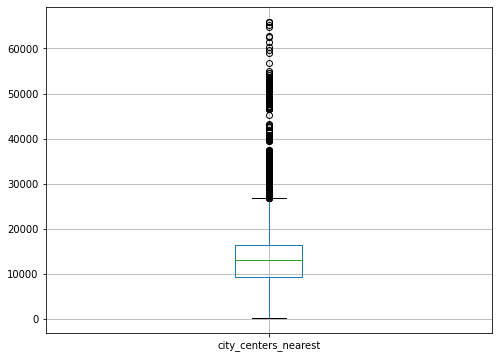

In [ ]:
data.boxplot(column='city_centers_nearest', figsize=(8, 6))

на данной диаграмме мы видим выбросы по удаленности от центра. здесь замечены выбросы от 28000 мы можем предположить что это другие населенные пункты, но данные аномалии нам не чем заменить, их аномалия не ясна, не будем забывать про эту аномалию при нашем иследовании

<AxesSubplot:>

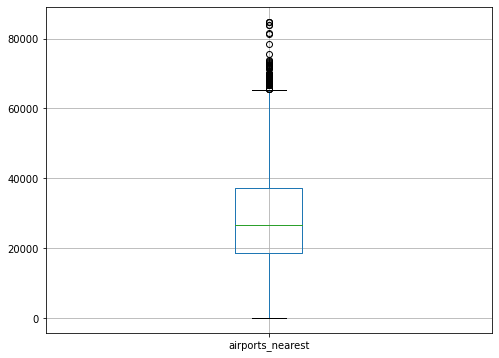

In [ ]:
data.boxplot(column='airports_nearest', figsize=(8, 6))

в диаграмме удаленности аэропорта имеются выбросы. аномалия их не известна заменить их не чем. мы будем иметь это ввиду когда будем делать наше иследование

Вывод : сделали предобработку данных, а именно:
Изменили типы данных,
привели имена столбцов к единому стилю,
обработали явные и неявные дубликаты,
также обработали пропуски.

все что относится к категории геолокации имеет примерно одинаковое количество пропусков 5518 - и что это скорее всего техническая ошибка, но так как это примерно 20% дата сета - удалять не буду - вставлять что то типа "неизвестно" тоже так как будет в столбце 2 типа данных - просто будем иметь ввиду


### Посчитайте и добавьте в таблицу новые столбцы

Произведем расчет данных и добавим их в таблицу для дальнейшего исследования

price_one_square_meter: цена одного квадратного метра;

exposition_weekday: день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

exposition_month: месяц публикации объявления;

exposition_year: год публикации объявления;

floor_category: тип этажа квартиры (значения — «первый», «последний», «другой»);
city_centers_nearest_km: расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [ ]:
# Добавим столбец с ценой за 1м²
data['price_one_square_meter'] = data['last_price'] / data['total_area']

In [ ]:
# проверим
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000,40.4,2018-12-04,1,2.63,11.0,18.600000,1,False,...,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000,56.0,2015-08-20,2,2.70,5.0,34.300000,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000,159.0,2015-07-24,3,2.70,14.0,90.760684,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000


In [ ]:
# Добавим столбец с днем недели публикации объявления
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday

# Добавим столбец с месяцем публикации объявления
data['exposition_month'] = data['first_day_exposition'].dt.month

# Добавим столбец с годом публикации объявления
data['exposition_year'] = data['first_day_exposition'].dt.year

In [ ]:
# проверим
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.63,11.0,18.600000,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.70,5.0,34.300000,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.70,14.0,90.760684,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018


In [ ]:
# Функция для этажности в доме
def get_floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [ ]:
# Добавляем столбец с категорией этажа квартиры
data['floor_category'] = data.apply(get_floor_category, axis=1)

In [ ]:
# проверим
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.63,11.0,18.600000,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.70,5.0,34.300000,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой
3,0,64900000,159.00,2015-07-24,3,2.70,14.0,90.760684,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой
5,10,2890000,30.40,2018-09-10,1,2.60,12.0,14.400000,5,False,...,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,другой
6,6,3700000,37.30,2017-11-02,1,2.64,26.0,10.600000,6,False,...,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,другой
7,5,7915000,71.60,2019-04-18,2,2.70,24.0,40.870849,22,False,...,0.0,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другой
8,20,2900000,33.16,2018-05-23,1,2.70,27.0,15.430000,26,False,...,NaN,NaN,NaN,NaN,189.0,87454.764777,2,5,2018,другой
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.600000,7,False,...,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой


In [ ]:
# добавим столбец расстояние до центра (переведем м в км)
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

In [ ]:
# проверим
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.63,11.0,18.600000,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.70,5.0,34.300000,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.70,14.0,90.760684,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


Вывод: Добавили необходимые столбцы и произвели расчеты по ним. Из-за пропусков в исходных данных, в расчетных значениях также есть пропуски. Например столбце floor_category для 85 строк категория этажа могла определиться неверно (вместо последний или первый указывается другой), значения количества этажей для этих объектов отсутствуют. Учитывая то, что доля возможных ошибок крайне мала, на результаты исследования они не повлияют.

### Проведите исследовательский анализ данных

Общая площадь

In [ ]:
# Посмторим описательную часть для этого столбца
data['total_area'].describe()

count    23518.000000
mean        60.389901
std         35.726356
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

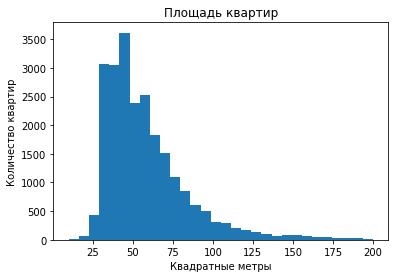

In [ ]:
# Работаем с площадью
plt.hist(data['total_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()


Общая площадь - Рассматриваемый диапазон до примерно 115 м². Большая часть объектов недвижимости имеют площадь от 30 до 65 м². Самый распространенный вариант - около 45 м². Площадь объектов более 100 м² встречается редко. С площадью меньше 30 м² также редкость. Среднее значение - 60 м² и медиана 52 м² сдвинуты в сторону больших значений. Их не так много, но график получается растянутым.

жилая площадь

In [ ]:
# посмотрим для этого столбца
data['living_area'].describe()

count    23518.000000
mean        34.611147
std         22.391254
min          2.000000
25%         19.000000
50%         30.000000
75%         42.200000
max        409.700000
Name: living_area, dtype: float64

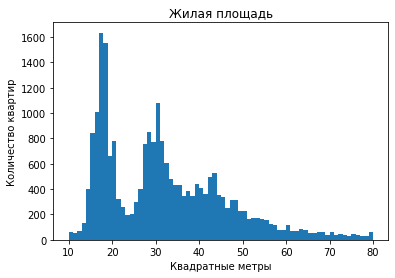

In [ ]:
# Работаем с жилой площадью
plt.hist(data['living_area'], bins=70, range=(10,80))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

жилая площадь - Большая часть объектов недвижимости имеют жилую площадь от 15 до 35 м². Самый распространенный вариант - около 15 м². Жилая площадь объектов более 60 м² встречается редко. С площадью меньше 15 м² также редкость. Среднее значение - 34 м², медиана 30 м². У графика также наблюдается "хвост" из-за редких, но больших значений.

площадь кухни

In [ ]:
# Посмторим описательную часть для этого столбца
data['kitchen_area'].describe()

count    23518.000000
mean        10.515045
std          6.049036
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

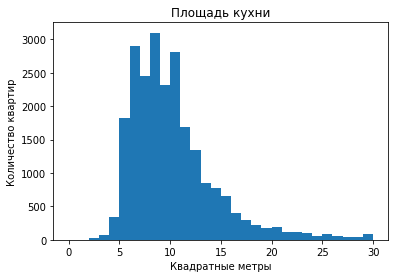

In [ ]:
# Работаем с площадью кухни
plt.hist(data['kitchen_area'], bins=30, range=(0,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

площадь кухни - Большая часть объектов недвижимости имеют площадь кухни от 5,5 до 12 м². Самый распространенный вариант - около 5,5 м². Площадь кухни более 13 м² встречается редко. Площадь кухни менее 5 м² также редкость. Среднее значение - 10,5 м², медиана 9,1 м². У графика также наблюдается небольшой "хвост" из-за редких, но больших значений.

цена объекта

In [ ]:
# посмотрим для этого столбца
data['last_price'].describe()

count    2.351800e+04
mean     6.561701e+06
std      1.089632e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

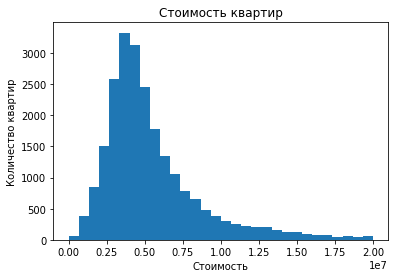

In [ ]:
# Работаем со стоимостью
plt.hist(data['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

цена объекта.- Рассматриваем диапазон до примерно 12 млн руб., исключая некорректные значения. Большинство объектов недвижимости имеют цену в пределах от 3 до 5 млн. руб.. Самый распространенный вариант - около 3.5 млн.руб.. Вариантов с ценой более 10 млн немного. Среднее значение - 6,5 млн, медиана 4,6 млн. У графика также наблюдается небольшой «хвост».

количество комнат

In [ ]:
# Посмторим описательную часть для этого столбца
data['rooms'].describe()

count    23518.000000
mean         2.071052
std          1.079843
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

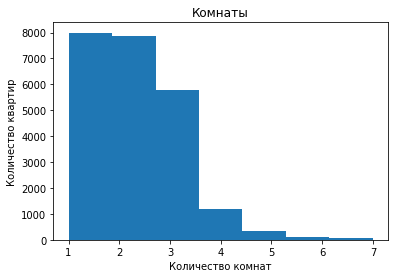

In [ ]:
# Работаем с комнатами
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

количество комнат - Рассматриваемый диапазон от 1 до 5 комнат, исключая некорректные значения (0 комнат) и выбросы. Большая часть объектов недвижимости имеют 1 или 2 комнаты, чуть меньше - 3 комнаты. Объектов, с кол-вом комнат 4-5 относительно немного. Среднее и медиана 2 комнаты точны. Крайне редкие значения (от 6 до 19 комнат) не оказывают существенного влияния на среднее значение.

высота потолков

In [ ]:
# Посмторим описательную часть для этого столбца
data['ceiling_height'].describe()

count    23518.000000
mean         2.703506
std          0.225781
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64

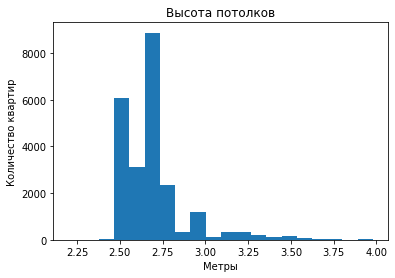

In [ ]:
# Работаем с потолками
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

высота потолков - Рассматриваем диапазон от 2,5 до 2,85 м, исключая некорректные значения и выбросы. Большинство объектов недвижимости имеют высоту потолков 2,5 м и 2,65 м(большинство). Реже представлены варианты от 2,7м до 2,85 м. Среднее 2,7 м и медиана 2,65 точны.

этаж квартиры

In [ ]:
# Посмторим описательную часть для этого столбца
data['floor'].describe()

count    23518.000000
mean         5.909814
std          4.888577
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

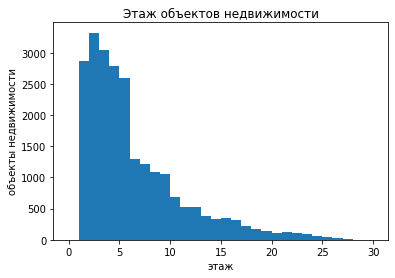

In [ ]:
# Построим гистограмму этажа квартиры
plt.hist(data['floor'], bins=30, range=(0,30))
plt.title('Этаж объектов недвижимости')
plt.xlabel('этаж')
plt.ylabel('объекты недвижимости')
plt.show()

этаж квартиры - Рассматриваемый диапазон с 1 по 17 этаж, исключая некорректные значения и выбросы. Большинство объектов недвижимости расположены с 1 по 4 этаж. Реже представлены варианты с 4 по 7. Среднее 5 этаж и медиана 4 этаж.

тип этажа квартиры («первый», «последний», «другой»)

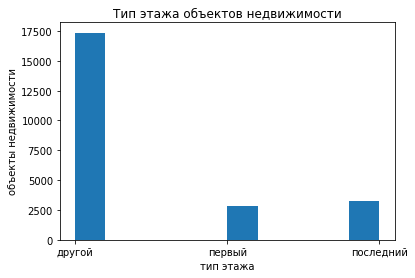

In [ ]:
plt.hist(data['floor_category'], bins=10)
plt.title('Тип этажа объектов недвижимости')
plt.xlabel('тип этажа')
plt.ylabel('объекты недвижимости')
plt.show()

тип этажа квартиры - Видно, что объекты недвижимости, расположенные на первом и последним этажах имеют примерно одинаковые значения и их доля не столь велика. В основном объекты расположены на этажах между первым и последним.

общее количество этажей в доме

In [ ]:
# Выведем описательную статистику для столбца
data['floors_total'].describe()

count    23518.000000
mean        10.718088
std          6.596309
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

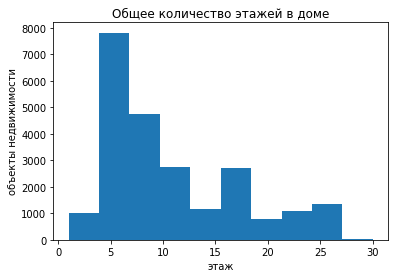

In [ ]:
plt.hist(data['floors_total'], bins=10, range=(1,30))
plt.title('Общее количество этажей в доме')
plt.xlabel('этаж')
plt.ylabel('объекты недвижимости')
plt.show()

общее количество этажей в доме - Рассматриваемый диапазон с 1 по 17 этаж, исключая некорректные значения и выбросы. Большинство объектов недвижимости - это 5-ти , 9-ти этажки. Остальные варианты представлены реже. Среднее 10 этаж и медиана 9 этаж.

расстояние до центра города в метрах

In [ ]:
# Выведем описательную статистику для столбца
data['city_centers_nearest'].describe()

count    18127.000000
mean     14194.157721
std       8604.449682
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

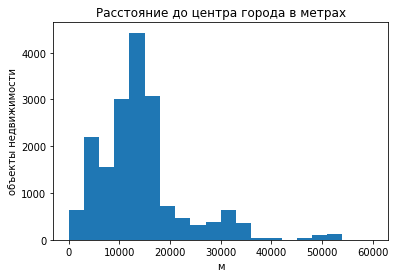

In [ ]:
plt.hist(data['city_centers_nearest'], bins=20, range=(1,60000))
plt.title('Расстояние до центра города в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

расстояние до центра города в метрах - Рассматриваемый диапазон с 3000 до 22000 м, исключая некорректные значения и выбросы. Большинство объектов недвижимости расположены на удалении 13-14 км от центра. Остальные варианты представлены реже. Среднее 13,9 км и медиана 13 км.

расстояние до ближайшего аэропорта

In [ ]:
# Выведем описательную статистику для столбца
data['airports_nearest'].describe()

count    18104.000000
mean     28802.017344
std      12636.996462
min          0.000000
25%      18574.750000
50%      26756.500000
75%      37298.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [ ]:
# Уберем значения равные 0
data = data.query('airports_nearest != 0')

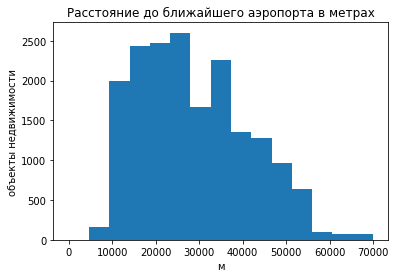

In [ ]:
# Построим гистограмму до ближайшего аэропорта
plt.hist(data['airports_nearest'], bins=15, range=(1,70000))
plt.title('Расстояние до ближайшего аэропорта в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

расстояние до ближайшего аэропорта - Рассматриваемый диапазон с 0 до 65000 м. Большинство объектов недвижимости расположены на удалении от аэропорта на расстоянии 15-25 км. Ближайший к аэропорту объект на расстоянии 6,5 км. Среднее 28,8 км и медиана 26,7 км.

расстояние до ближайшего парка

In [ ]:
# Посмотрим описательную статистику
data['parks_nearest'].describe()

count    8060.000000
mean      490.842308
std       342.616161
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

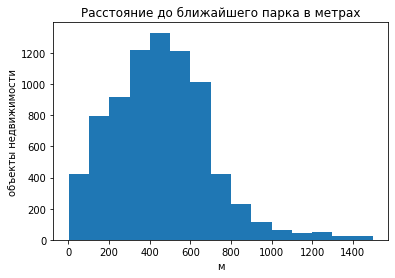

In [ ]:
# Построим гистограмму до ближайшего парка
plt.hist(data['parks_nearest'], bins=15, range=(1,1500))
plt.title('Расстояние до ближайшего парка в метрах')
plt.xlabel('м')
plt.ylabel('объекты недвижимости')
plt.show()

расстояние до ближайшего парка - Рассматриваемый диапазон с 0 до 1100 м. Большинство объектов недвижимости расположены на удалении от ближайшего парка на расстоянии 400-600м. Ближайшие к парку объект на расстоянии 500м. Среднее 490м и медиана 454м.

день и месяц публикации объявления

array([[<AxesSubplot:title={'center':'exposition_month'}>]], dtype=object)

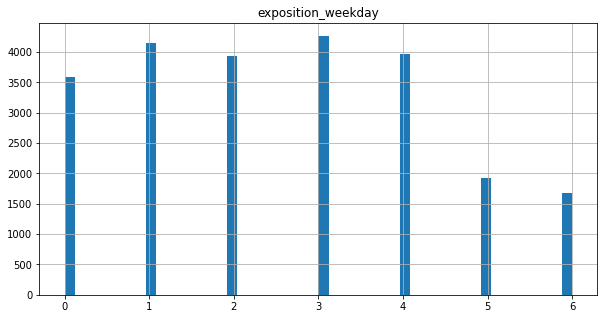

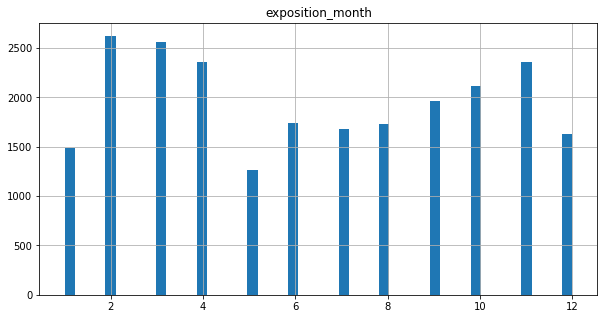

In [ ]:
data.hist('exposition_weekday', bins=50, figsize=(10,5))
data.hist('exposition_month', bins=50, figsize=(10,5))

день и месяц публикации объявления - По графику видно, что чаще всего объявления публиковали в будние дни в середине недели. Реже в выходные дни. По графику видно, что чаще всего объявления публиковали после январских праздников, в феврале. Наименьшие показатели в январе и мае. Можно предположить, что это из-за большого кол-ва выходных и праздничных дней.

Вывод: Мы получили представление о хорошем объекте недвижимости из исходных данных: квартира с 1 или 2 комнатами, 5-ти или 9-ти этажка, общей площадью около 45 м², площадью кухни около 5,5 м², с высотой потолков 2,6 м, стоимостью около 3.5 млн.руб, расположенной на удалении от центра на расстоянии 10000-16000 метров, от аэропорта на расстоянии 15000-25000 м, до ближайшего парка около 400-600 метров

Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.

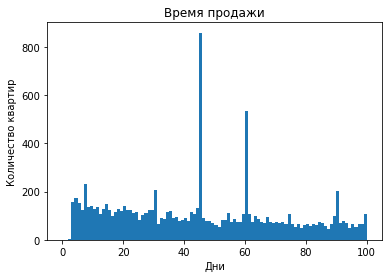

In [ ]:
# Гистограма времени продажи
plt.hist(data['days_exposition'], bins=100, range=(0,100))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

In [ ]:
# Изучаем значения срока продажи
data['days_exposition'].describe()

count    20363.000000
mean       180.975151
std        220.068678
min          1.000000
25%         45.000000
50%         95.000000
75%        231.500000
max       1580.000000
Name: days_exposition, dtype: float64

Судя по графику, чаще всего квартиры продают за 45 и 60 дней. Но, возможно квартира не продана, а просто снято объявление в связи с истекшим сроком публикации. Также объявление может остаться на сайте, даже если объект недвижимости уже фактически продан, просто забыли снять объявление. В этом случае если пользователь не потдвердит актуальность объявления, оно может быть автоматически удалено.

Среднее время продажи объекта недвижимости 181 день, медианное - 95 дней. Максимальное значение - 1580 дней. Больших значений достаточно много. Среднее значение в 2 раза больше медианного. Стандартное отклонение превышает среднее значение - это говорит о большом количестве выбросов. Чтобы посмотреть на всю эту красоту нужно построить диаграмму размаха.

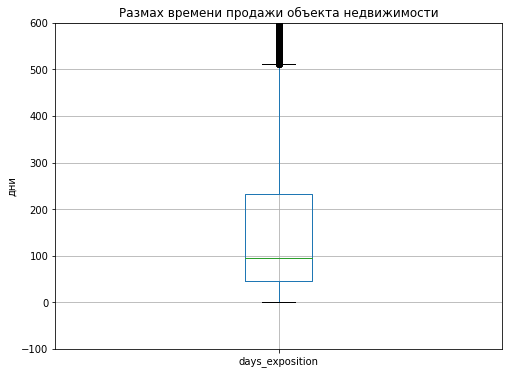

In [ ]:
# посмотрим диаграмму размаха времени продажи объекта недвижимости
data.boxplot(column='days_exposition', figsize=(8, 6))
plt.title('Размах времени продажи объекта недвижимости')
plt.ylim(-100, 600)
plt.ylabel('дни')
plt.show()

Оценка времени продажи: быстрая продажа - до 45 дней, нормальная продажа - от 45 до 231 дней, долгая продажа - от 231 до 510 дней. Продажи после 510 дней - выбросы.

Какие факторы больше всего влияют на общую (полную) стоимость объекта?



Изучите, зависит ли цена от:

общей площади;

жилой площади;

площади кухни;

количества комнат;

этажа, на котором расположена квартира (первый, последний, другой);

даты размещения (день недели, месяц, год).

Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.63,11.0,18.600000,1,False,...,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.70,5.0,34.300000,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.70,14.0,90.760684,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


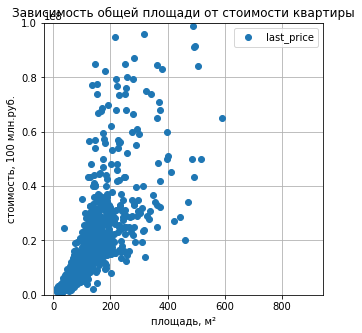

0.6538404123064596

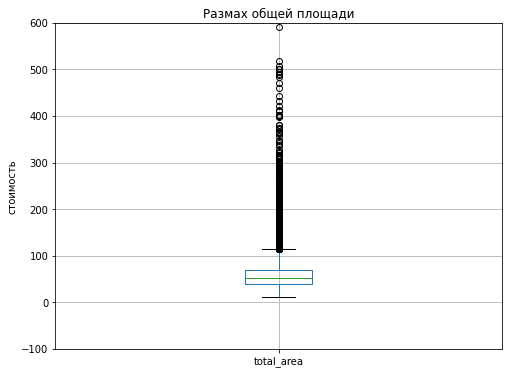

In [ ]:
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))

plt.title('Зависимость общей площади от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

data.boxplot(column='total_area', figsize=(8, 6))
plt.title('Размах общей площади')
plt.ylim(-100, 600)
plt.ylabel('стоимость')

data['last_price'].corr(data['total_area'])

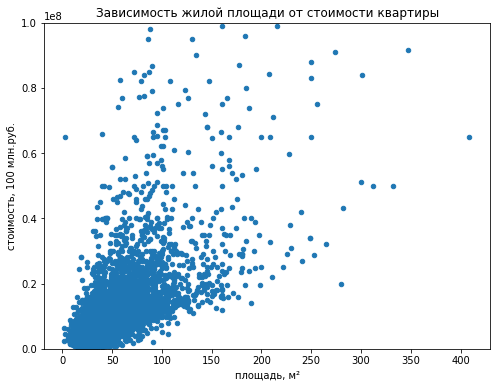

0.5853898635069632

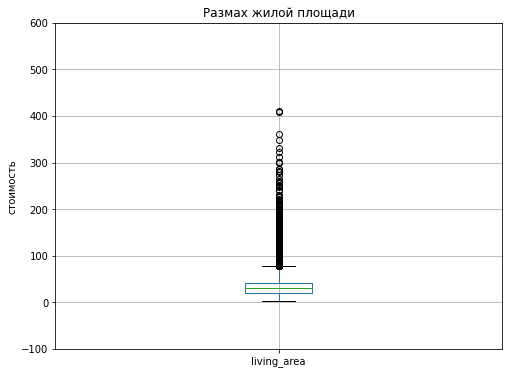

In [ ]:
# используем тип графика scatter
data.plot(x='living_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True)

plt.title('Зависимость жилой площади от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

data.boxplot(column='living_area', figsize=(8, 6))
plt.title('Размах жилой площади')
plt.ylim(-100, 600)
plt.ylabel('стоимость')

data['last_price'].corr(data['living_area'])

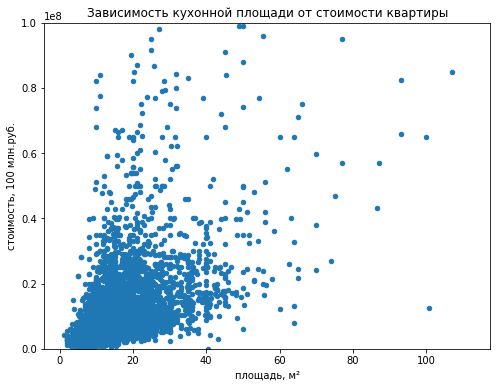

0.5150691848516898

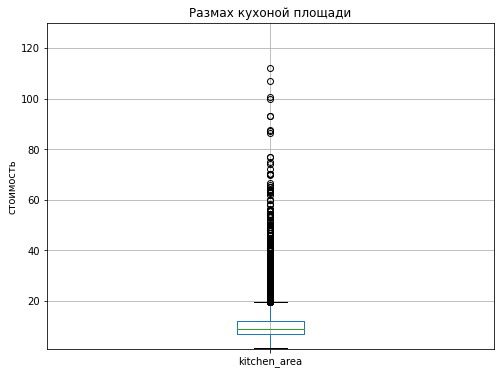

In [ ]:
# используем тип графика scatter
data.plot(x='kitchen_area', y ='last_price', kind ='scatter', figsize=(8, 6), legend=True)

plt.title('Зависимость кухонной площади от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 100 млн.руб.')
plt.ylim(0, 100000000)
plt.show()

data.boxplot(column='kitchen_area', figsize=(8, 6))
plt.title('Размах кухоной площади')
plt.ylim(1, 130)
plt.ylabel('стоимость')

data['last_price'].corr(data['kitchen_area'])

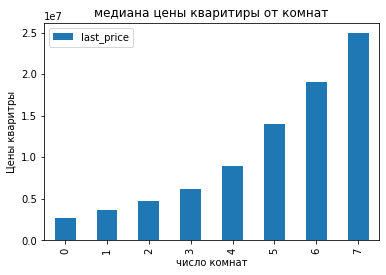

0.3638178197821507

In [ ]:
data_pivot = data.pivot_table(index='rooms', values='last_price', aggfunc=['count', 'median'])
data_pivot = data_pivot.query('@data_pivot.index <= 7')
data_pivot
data['last_price'].corr(data['rooms'])

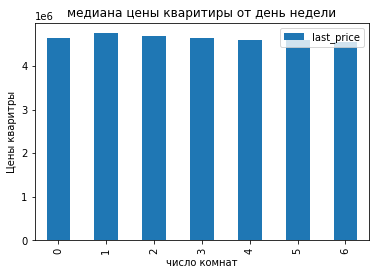

0.002594918646829785

In [ ]:
# Зависимость от дня размещения
data_pivot = data.pivot_table(index='exposition_weekday', values='last_price', aggfunc=['count', 'median'])
data_pivot.plot(y='median', kind='bar', ylabel='Цены кваритры', xlabel='д')
plt.title(label = 'медиана цены кваритиры от день недели')
plt.show()
data['last_price'].corr(data['exposition_weekday'])

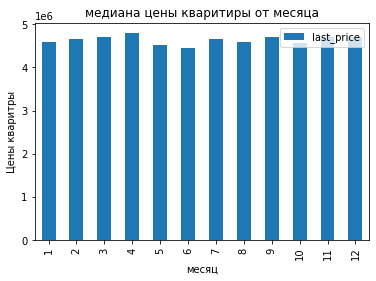

0.0026434180024107992

In [ ]:
# Зависимость от месяца размещения
data_pivot = data.pivot_table(index='exposition_month', values='last_price', aggfunc=['count', 'median'])
data_pivot.plot(y='median', kind='bar', ylabel='Цены кваритры', xlabel='месяц')
plt.title(label = 'медиана цены кваритиры от месяца')
plt.show()
data['last_price'].corr(data['exposition_month'])

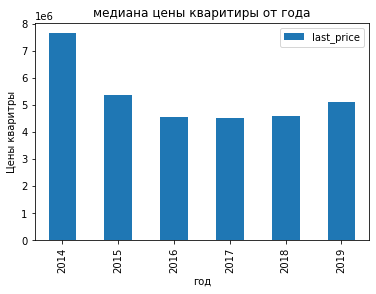

-0.04274860240706066

In [ ]:
# Зависимость от года размещения
data_pivot = data.pivot_table(index='exposition_year', values='last_price', aggfunc=['count', 'median'])
data_pivot.plot(y='median', kind='bar', ylabel='Цены кваритры', xlabel='год')
plt.title(label = 'медиана цены кваритиры от года')
plt.show()
data['last_price'].corr(data['exposition_year'])

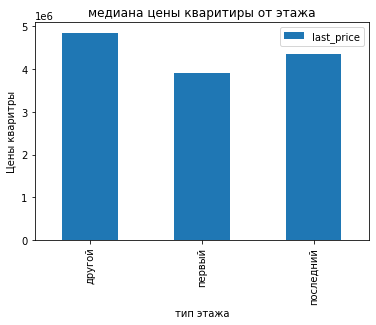

,mean,count,median
floor_category,,,
другой,6.688905e+06,17356,4850000
первый,4.841031e+06,2873,3900000
последний,7.393603e+06,3288,4350000


In [ ]:
# Зависимость от типа этажа
# Создаем сводную таблицу
table_category = data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
table_category.plot(y='median', kind='bar', ylabel='Цены кваритры', xlabel='тип этажа')
plt.title(label = 'медиана цены кваритиры от этажа')
plt.show()
# Присваиваем названия колонкам
table_category.columns = ['mean', 'count', 'median']
table_category

общей площади - Из графика видно, что больше всего данных для квартир по стоимости и площади. Зависимость прямопропорциональная - чем больше площадь квартиры, тем выше цена. Коэффициент корреляции = 0.65, что подтверждает наличие зависимости.

жилой площади - Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб. и жило площадью до 75 м².
Зависимость прямопропорциональная - чем больше жилая площадь квартиры, тем выше ее стоимость. Расчет корреляции показывает так же зависимость. Коэффицент корреляции = 0.58.

площади кухни - Из графика видно, что цена зависит от площади кухни, это так же подтверждает корреляция коэффицент которой составил = 0.51. Предподчения отдают средней по размеру кухне

количества комнат - Из графика видно, что больше всего данных для квартир кол-вом комнат от 1 до 2. Для этого диапазона: с увеличение числа комнат до 3-5 комнат стоимость квартир растет. Коэффицент корреляции = 0.36, что дает нам понять что взаимосвязь есть но маленькая.

даты размещения (день недели, месяц, год) - Зависимость между датой размещения объявления (день недели, месяц, год) и стоимостью квартир отсутствует. Также из ранее построенной матрицы корреляции видно, что Коэффициенты корреляции отрицательные и близки к нулю.

этажа, на котором расположена квартира (первый, последний, другой) - Из графика видно, что медианное значение для квартир на первом этаже минимальное. Максимальное медианное значение стоимости квартир - для квартир отличных от первого и последнего этажа.

ВЫВОД: На общую стоимость объекта больше всего влияет общая площадь квартиры, жилая и кухонная. Чем больше площадь, тем выше стоимость. На первом и последнем этажах стоимость квартиры меньше, чем на других. Дата публикации объявления на стоимость не влияет

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [ ]:
#ТОП 10 населенных пунктов с наибольшим числом объявлений
top_10 = data['locality_name'].value_counts().head(10)
top_10

Санкт-Петербург    15714
 Мурино              556
 Шушары              440
Всеволожск           398
Пушкин               369
Колпино              338
 Парголово           327
Гатчина              307
 Кудрово             299
Выборг               237
Name: locality_name, dtype: int64

In [ ]:
# Выведем среднюю цену за кв м по топ 10 населенным пунктам
top_10 = data.query('locality_name in @top_10.index').pivot_table(index='locality_name', values='price_one_square_meter')
top_10.sort_values(by='price_one_square_meter', ascending=False)

,price_one_square_meter
locality_name,
Санкт-Петербург,114781.659894
Пушкин,103125.819291
Кудрово,92473.547576
Парголово,90175.913458
Мурино,85681.762601
Шушары,78677.364217
Колпино,75424.579098
Гатчина,68746.146763
Всеволожск,68654.473986


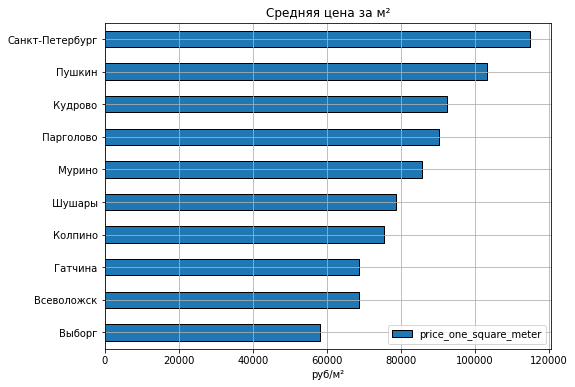

In [ ]:
# Отобразим на графике среднюю цену квадратного метра в топ 10 населенных пунктах

top_10.sort_values(by='price_one_square_meter').plot(kind='barh', legend=True, grid=True, ec='black', figsize=(8, 6))

plt.title('Средняя цена за м²')
plt.xlabel('руб/м²')
plt.ylabel('')
plt.show()

Вывод:
Из графика видно, что наибольшая средняя цена за 1 квадратный метр в Санкт-Петербурге(111722 руб.), что логично. Следом по стоимости идет Пушкин(101894 руб.), что тоже логично - много исторических мест, парков и расположен к городу ближе, чем, например, Гатчина и Выборг. Наименьшая цена за квадратный метр в Выборге(57011 руб.).

Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [ ]:
# выберем только Санкт-Петербург
data_spb = data.query('locality_name == "Санкт-Петербург"')
data_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
2,10,5196000,56.0,2015-08-20,2,2.70,5.0,34.300000,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.70,14.0,90.760684,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0
7,5,7915000,71.6,2019-04-18,2,2.70,24.0,40.870849,22,False,...,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другой,12.0


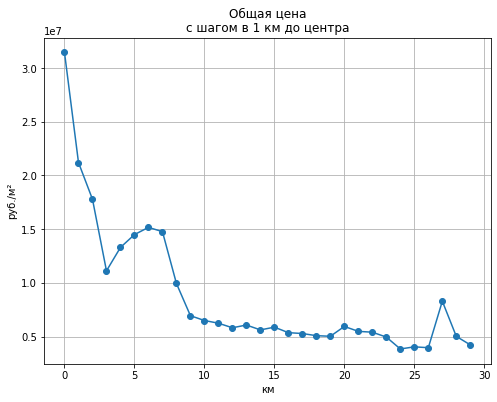

In [ ]:
# Рассчитаем среднюю цену квадратного метра до центра
(
data_spb
    .pivot_table(index='city_centers_nearest_km', values='last_price')
    .plot(marker='o', grid=True, figsize=(8, 6), legend=False)
)
plt.title('Общая цена\nс шагом в 1 км до центра')
plt.xlabel('км')
plt.ylabel('руб./м²')
plt.show()

Из графика можно заметить, что после 7 километров форма графика становится линейной и стоимость начинается уменьшаться. Максимальная стоимость в зоне у самого центра(до 1 км). Пик в районе 27-30 км - возможен из-за класса жилья - элитное.

# Общий вывод

Общий вывод
Мы обработали полученный архив данных - обработали пропущенные значения там, где это необходимо, заменили типы данных на необходимые для удобной работы.Пропуски в некоторых колонках были восполнены медианным значением или же вовсе, восполнены нулями из-за отсутствия тех или иных параметров или вовсе убраны не корректные значения. Были также и такие колонки, где данные получены автоматически на основе картографических данных и пропуски в них были оставлены без изменения.
Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир.

Время продажи:
Изучая время продажи квартир мы выявили, что большое количество объявлений было автоматически снято и дату из снятия нельзя считать датой продажи квартиры, поэтому, изучая средние сроки продажи квартир - данные значения не учитывались.  Мы выявили при помощи диаграммы, что нормальные значения продажи квартир варьируются от 1 до 600 дней.
В основном квартиры продаются за срок в 100 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.

Влияние на стоимость квартиры:
Наибольшее влияние на стоимость квартиры оказывает её площадь. Чем больше площадь квартиры, тем выше её стоимость. Также на стоимость квартиры влияет количество комнат, и жилой площади. Так же есть взаимосвязь с этажом на котором продается квартира. На стоимость квартиры также влияет расстояние до центра города. Чем ближе квартира располагается к центру, тем выше ее стоимость. А вот день, месяц и год практичеси не влияют на стоимость квартиры.

Стоимость площади в топ-10 населённых пунктов:
Дороже всего квадратный метр в Санкт-Петербурге - 114848
Дешевле всего квадратный метр в Выборге - 58141

Факторы, влияющие на стоимость в центре Санкт-Петербурга
•	В центре города практически нет разницы, насколько квартира удалена от условного центра города.
•	В центре города последний этаж практически не влияет на стоимость квартиры, в отличие от остального города.
•	В центре есть очень дорогие однокомнатные квартиры
•	Экономическая ситуация в стране мало влияет на элитную недвижимость в центре

Исходя из данного иследования
Мы получили представление о типичном объекте недвижимости: квартира с 1 или 2 комнатами, 5-ти или 9-ти этажка (с квартирой с 1 по 4 этаж), общей площадью около 45 м², площадью кухни около 5,5 м², с высотой потолков 2,6 м, стоимостью около 3.5 млн.руб, расположенной на удалении от центра на расстоянии 11-16 км, от аэропорта на расстоянии 15-25 км, до ближайшего парка около 500 метров.
Так же можно проанализировать на наличие балконов (какие квартиры пользуются больше спросом? С балконом или без). Еще проанализировать студии (как и по какой цене идет продажа?) и влияют ли  тип недвижемости (аппартамены и жилое помещение) на ценну недвижимости?